#RoboKlam AI/ML Assignment - Problem 1
###By Rohit Suryavanshi	
###Email: rohitsurya7777@gmail.com	Phone no. : 8291942333


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Importing from Github link : https://github.com/rohitsurya26/roboklam , it is made public
### Drive link: https://drive.google.com/drive/folders/16w2K3jzhhKJ-EA_uq2wTDyuXJfHKgai2?usp=sharing Contains both answers to the assignment, and jupyter notebook is in Google Colab notebook 

In [26]:
## Importing from Github link : https://github.com/rohitsurya26/roboklam , it is made public
df=pd.read_csv('https://raw.githubusercontent.com/rohitsurya26/roboklam/main/HR_comma_sep.csv')

In [27]:
df.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary
0,0.53,2,157,3,0,0.38,1,0,sales,low
1,0.86,5,262,6,0,0.80,1,0,sales,medium
2,0.88,7,272,4,0,0.11,1,0,sales,medium
3,0.87,5,223,5,0,0.72,1,0,sales,low
4,0.52,2,159,3,0,0.37,1,0,sales,low


### Converting the categorical entries to integers using numpy : Known as One-Hot Encoding

In [4]:
roles=df.role.unique()
def role_to_num(role):
    return np.where(roles==role)[0][0]

salaries=df.salary.unique()
def salary_to_num(salary):
    return np.where(salary==salaries)[0][0]

df['role']=df['role'].apply(role_to_num)
df['salary']=df['salary'].apply(salary_to_num)

### Identifyng whether the features used in the dataset are independent or not and removing if any were found to have high correlation values

                       last_evaluation  number_project  average_montly_hours  \
last_evaluation               1.000000        0.349333              0.339742   
number_project                0.349333        1.000000              0.417211   
average_montly_hours          0.339742        0.417211              1.000000   
time_spend_company            0.131591        0.196786              0.127755   
Work_accident                -0.007104       -0.004741             -0.010143   
satisfaction_level            0.105021       -0.142970             -0.020048   
left                          0.006567        0.023787              0.071287   
promotion_last_5years        -0.008684       -0.006064             -0.003544   
role                          0.011855        0.005577             -0.002387   
salary                       -0.013002       -0.001803             -0.002242   

                       time_spend_company  Work_accident  satisfaction_level  \
last_evaluation                  0.1315

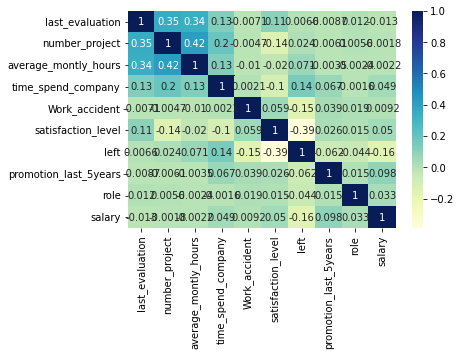

In [5]:
print(df.corr())
  
# Plotting correlation heatmap
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [25]:
## Rearranging columns  
cols = df.columns.tolist()
cols.remove('left')
cols.append('left')
df=df[cols]

In [7]:
## To make everything of same scale, divided this column by 100
df['average_montly_hours']/100

0        1.57
1        2.62
2        2.72
3        2.23
4        1.59
         ... 
14994    1.51
14995    1.60
14996    1.43
14997    2.80
14998    1.58
Name: average_montly_hours, Length: 14999, dtype: float64

### Removing any Outliers present in the dataset for implementing a better model by replacing them with Null value and removing them

In [8]:
## Removing features which are categorical, binary and important features
numeric_feature=list(df.columns)
numeric_feature.pop(-1)
numeric_feature.pop(-1)
numeric_feature.pop(-1)
numeric_feature.remove('Work_accident')
numeric_feature.remove('time_spend_company')


for x in numeric_feature:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    ## Replacing outliers with null values
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

['last_evaluation', 'number_project', 'average_montly_hours', 'satisfaction_level', 'promotion_last_5years']


In [9]:
## Removing the examples which where outliers and removing them null values
print(df.isnull().sum())
df = df[df['promotion_last_5years'].notna()]
print(df.isnull().sum())

last_evaluation            0
number_project             0
average_montly_hours       0
time_spend_company         0
Work_accident              0
satisfaction_level         0
promotion_last_5years    319
role                       0
salary                     0
left                       0
dtype: int64
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
satisfaction_level       0
promotion_last_5years    0
role                     0
salary                   0
left                     0
dtype: int64


### Stacking the training dataset into numpy matrix using stack function

In [10]:
cols=list(df.columns)
cols.pop()
X=np.column_stack((df[cols[0]].values,))
for i in cols :
    X=np.column_stack((X,df[i].values))
Y=df['left'].to_numpy()

[1 1 1 ... 1 1 1]


### Applying Logistic Regression model onto the dataset 

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1).fit(X_train, Y_train)
clf.predict(X_test)
print(clf.score(X_test,Y_test))


0.7852861035422344


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Applying Random Forest Classifier algorithm onto the dataset 

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=8, random_state=1)
clf.fit(X_train, Y_train)
print(clf.score(X_test,Y_test))

0.9790190735694823


### Applying K Nearest Neighbor Classifiers model onto the dataset 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, Y_train)
neigh.score(X_test,Y_test)


0.9446866485013624

### Applying Support Vector Machine model onto the dataset

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, Y_train)
print(clf.score(X_test,Y_test))

0.964850136239782


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)


pipe1 = make_pipeline(StandardScaler(), LogisticRegression())
pipe1.fit(X_train_trans, Y_train)  # apply scaling on training data
print('Logistic Regression Model Accuracy: ',pipe1.score(X_test_trans, Y_test)  )

pipe2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=2))
pipe2.fit(X_train_trans, Y_train)  # apply scaling on training data
print('KNeighborsClassifier Model Accuracy: ',pipe2.score(X_test_trans, Y_test) )

pipe3 = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=8, random_state=0))
pipe3.fit(X_train_trans, Y_train)  # apply scaling on training data
print('RandomForestClassifier Model Accuracy:',pipe3.score(X_test_trans, Y_test) )


from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='scale'))
clf.fit(X_train_trans, Y_train)
print('Support Vector Machine Model Accuracy: ',clf.score(X_test_trans,Y_test))

Logistic Regression Model Accuracy:  0.8051771117166212
KNeighborsClassifier Model Accuracy:  0.9629427792915531
RandomForestClassifier Model Accuracy: 0.9784741144414169
Support Vector Machine Model Accuracy:  0.9596730245231607


## DEEP LEARNING ##

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Dense(units=10,input_shape=(10,), activation="relu"))
model.add(Dense(units=6,activation='relu'))
Dropout(0.5)
BatchNormalization()
model.add(Dense(units=6,activation='relu'))
Dropout(0.5)
BatchNormalization()
model.add(Dense(units=3,activation='relu',kernel_regularizer=keras.regularizers.l2()))
BatchNormalization()
model.add(Dense(units=1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2()))

In [21]:
model.compile(keras.optimizers.Adam(learning_rate=0.05),loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train, epochs=2, batch_size=1,shuffle=True)

Epoch 1/2
11010/11010 [==============================] - 34s 3ms/step - loss: 0.5658 - accuracy: 0.7564
Epoch 2/2
11010/11010 [==============================] - 19s 2ms/step - loss: 0.5599 - accuracy: 0.7571


In [23]:
loss,accuracy=model.evaluate(X_train,Y_train)
print('Loss:',loss)
print('Accuracy:',accuracy)

345/345 [==============================] - 1s 2ms/step - loss: 0.5588 - accuracy: 0.7571
Loss: 0.558794379234314
Accuracy: 0.7571299076080322


In [24]:
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
29/29 [==============================] - 0s 2ms/step - loss: 0.5554 - accuracy: 0.7608
test loss, test acc: [0.5554463863372803, 0.7607629299163818]
